<a href="https://colab.research.google.com/github/Willyan04/trabalho-Willyan/blob/main/TrabalhoAnaliseTitanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn import model_selection, tree, preprocessing, metrics, linear_model
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LinearRegression, LogisticRegression, SGDClassifier
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV

In [ ]:
df_test = pd.read_csv('test.csv');
df_train = pd.read_csv('train.csv');

In [ ]:
df_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [ ]:
df_test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [ ]:
df_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
df_train = df_train.dropna(subset='Age')

In [ ]:
df_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          529
Embarked         2
dtype: int64

In [ ]:
sobrevi = df_train.loc[df_train['Survived'] == 1]
SobreviQuant = sobrevi.Survived.sum()
SobreviQuant

290

In [ ]:
(SobreviQuant / df_train.Survived.count())*100

40.61624649859944

In [ ]:
homens = df_train.loc[df_train['Sex'] == 'male']
mulheres = df_train.loc[df_train['Sex'] == 'female']

In [ ]:
homens.count()

PassengerId    453
Survived       453
Pclass         453
Name           453
Sex            453
Age            453
SibSp          453
Parch          453
Ticket         453
Fare           453
Cabin           95
Embarked       453
dtype: int64

In [ ]:
mulheres.count()

PassengerId    261
Survived       261
Pclass         261
Name           261
Sex            261
Age            261
SibSp          261
Parch          261
Ticket         261
Fare           261
Cabin           90
Embarked       259
dtype: int64

<Axes: >

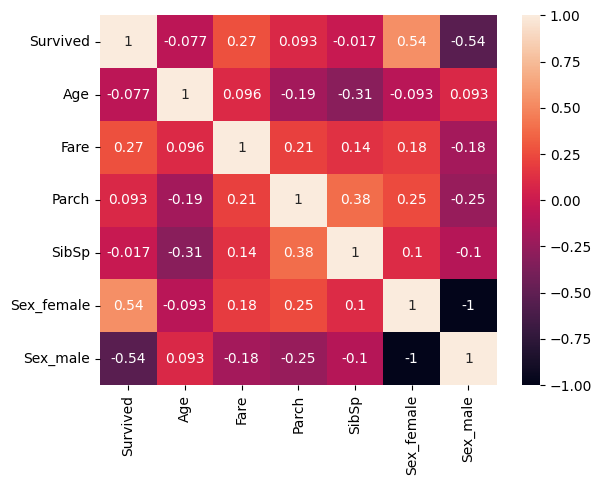

In [ ]:
sns.heatmap(pd.get_dummies(df_train[['Survived', 'Sex', 'Age', 'Fare', 'Parch', 'SibSp']]).corr(), annot=True)

Com base nas informações do gráfico, é possível observar que o fator que mais influenciou a taxa de sobrevivência foi o gênero, onde as mulheres tiveram uma taxa significativamente mais alta do que os homens. Em seguida, podemos notar que o preço pago pelo bilhete, que está relacionado com a classe mais alta e cabines mais elevadas, também desempenhou um papel importante na sobrevivência. Porém, é importante ressaltar que o gênero feminino teve uma prioridade maior em relação à sobrevivência. Além disso, a idade também teve um impacto negativo na taxa de sobrevivência, com as pessoas mais velhas apresentando uma taxa menor.

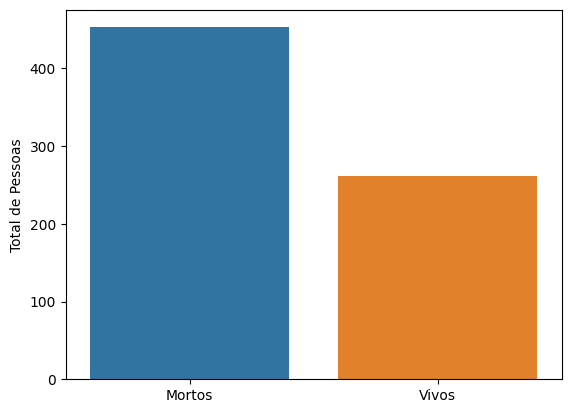

In [ ]:
Genero_Descri = sns.countplot(x='Sex', data=df_train)
Genero_Descri = Genero_Descri.set(ylabel='Total de Pessoas', xlabel='',xticklabels=['Mortos', 'Vivos'])

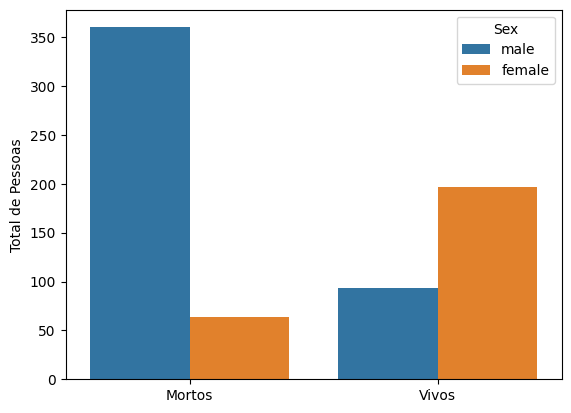

In [ ]:
VivosDoGenero = sns.countplot(x='Survived', hue='Sex', data=df_train)
VivosDoGenero = VivosDoGenero.set(ylabel='Total de Pessoas', xlabel='',xticklabels=['Mortos', 'Vivos'])

Ao analisar o gráfico, nota-se que a proporção de passageiros do sexo masculino era significativamente maior do que a de passageiros do sexo feminino. O número de passageiros do sexo masculino era quase o dobro em comparação com o número de passageiras do sexo feminino, o que indica que a amostra analisada estava majoritariamente composta por homens. Essa predominância de passageiros masculinos pode ter impactado os resultados relacionados à taxa de sobrevivência, uma vez que as medidas de resgate e evacuação podem ter priorizado, em maior escala, as passageiras femininas.

In [ ]:
homens_vivos = homens.loc[homens['Survived'] == 1]
homens_quanti_vivos = homens_vivos.Survived.sum()
homens_quanti_vivos

93

Todos homens que estão vivos

In [ ]:
(homens_quanti_vivos/homens.Survived.count())*100

20.52980132450331

Total de porcentagem de homens vivos

In [ ]:
mulheres_vivas = mulheres.loc[mulheres.Survived == 1]
mulheres_quanti_vivas = mulheres_vivas.Survived.sum()
mulheres_quanti_vivas

197

Total de mulheres que estão vivas

In [ ]:
(mulheres_quanti_vivas/mulheres.Survived.count())*100

75.47892720306514

Total de porcentagem de mulheres vivas

Apesar de haver uma maior quantidade de passageiros do sexo masculino em comparação com o sexo feminino, é interessante notar que as mulheres apresentaram uma porcentagem maior de sobreviventes em relação ao total. Mesmo sendo em menor número, a maioria dos sobreviventes foram mulheres. Isso sugere que, durante o evento analisado, houve uma priorização na evacuação e resgate das passageiras femininas, resultando em uma taxa de sobrevivência mais alta para as mulheres em relação aos homens.

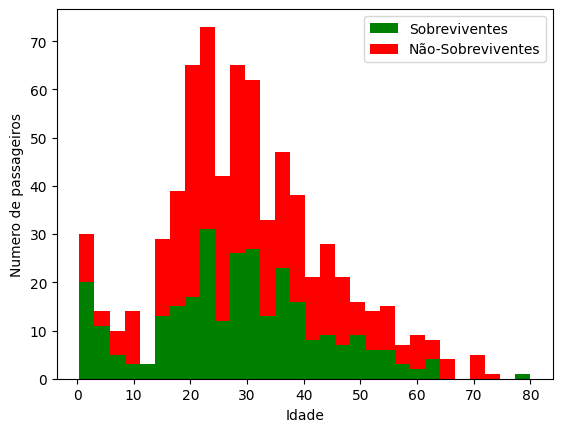

In [ ]:
plt.hist([df_train[df_train['Survived']==1]['Age'], df_train[df_train['Survived']==0]['Age']], stacked=True, color=['g','r'],
         bins=30,label=['Sobreviventes','Não-Sobreviventes'])
plt.xlabel('Idade')
plt.ylabel('Numero de passageiros')
plt.legend()

Text(0, 0.5, 'Numero de passageiros')

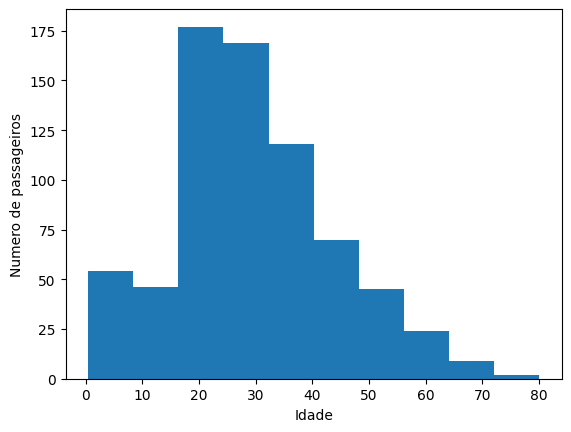

In [ ]:
plt.hist(df_train.Age)
plt.xlabel('Idade')
plt.ylabel('Numero de passageiros')

Analisando as informações, é possível constatar que os passageiros com idades entre 20 e 30 anos apresentaram o maior número de óbitos, com um valor central em torno dos 25 anos. No entanto, essa faixa etária também registrou o maior volume de sobreviventes. Além disso, os passageiros com aproximadamente 40 anos também tiveram uma quantidade expressiva de sobreviventes, chegando próximo ao número de sobreviventes da faixa etária de 20 a 30 anos. Esses dados revelam que, apesar de uma porção significativa dos passageiros entre 20 e 30 anos ter perdido a vida, também houve um considerável número de sobreviventes nesse grupo.

array([[<Axes: title={'center': 'PassengerId'}>,
        <Axes: title={'center': 'Survived'}>,
        <Axes: title={'center': 'Pclass'}>],
       [<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'SibSp'}>,
        <Axes: title={'center': 'Parch'}>],
       [<Axes: title={'center': 'Fare'}>, <Axes: >, <Axes: >]],
      dtype=object)

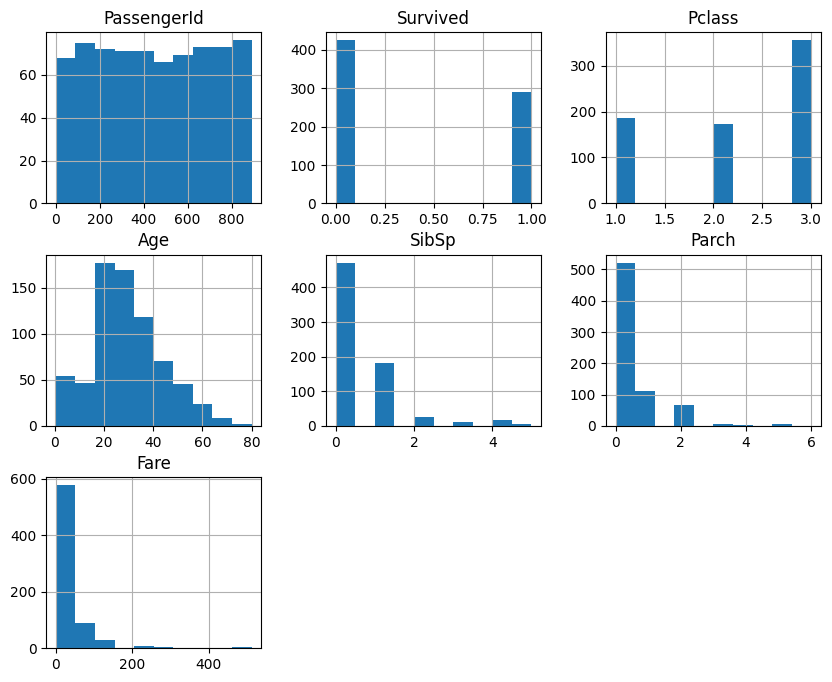

In [ ]:
df_train.hist(figsize=(10,8))

<Axes: xlabel='Pclass', ylabel='count'>

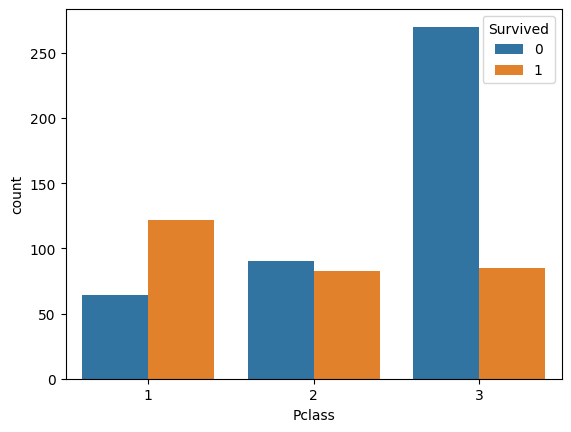

In [ ]:
sns.countplot(data=df_train, x='Pclass', hue='Survived')

<Axes: xlabel='SibSp', ylabel='count'>

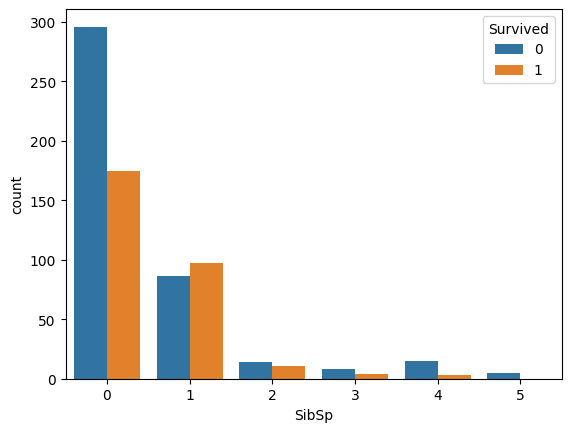

In [ ]:
sns.countplot(data=df_train, x='SibSp', hue='Survived')

<Axes: xlabel='Parch', ylabel='count'>

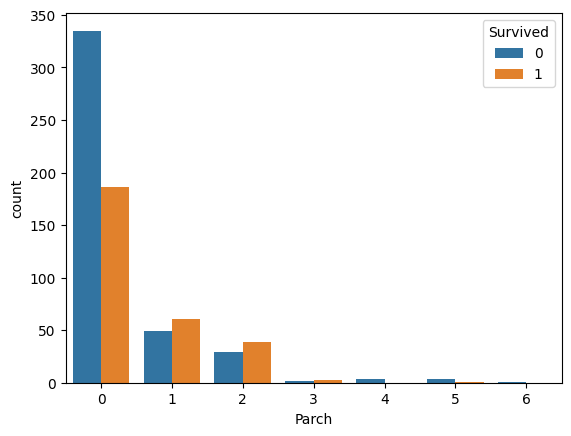

In [ ]:
sns.countplot(data=df_train, x='Parch', hue='Survived')

Analisando os dados, pode-se observar que a terceira classe registrou um número significativamente alto de óbitos, ultrapassando 250, enquanto as outras classes tiveram menos de 100 mortes no total. Além disso, foi constatado que os passageiros que viajavam sozinhos enfrentaram um risco muito maior de morte em comparação com os demais grupos, apesar de representarem a maior proporção do total de passageiros. Por outro lado, aqueles que estavam acompanhados por uma pessoa apresentaram uma maior probabilidade de sobrevivência em relação ao número total de passageiros, o mesmo ocorrendo com aqueles que estavam acompanhados por mais duas pessoas. Essas informações revelam a importância do fator social, indicando que ter companhia durante a viagem aumentou as chances de sobrevivência, enquanto os passageiros solitários enfrentaram maior vulnerabilidade. Além disso, a classe em que os passageiros estavam também teve um impacto significativo nos resultados de sobrevivência, com a primeira classe apresentando o maior número de sobreviventes, ultrapassando 100, enquanto as outras duas classes não atingiram sequer 100 sobreviventes cada.

<Axes: xlabel='Sex', ylabel='Survived'>

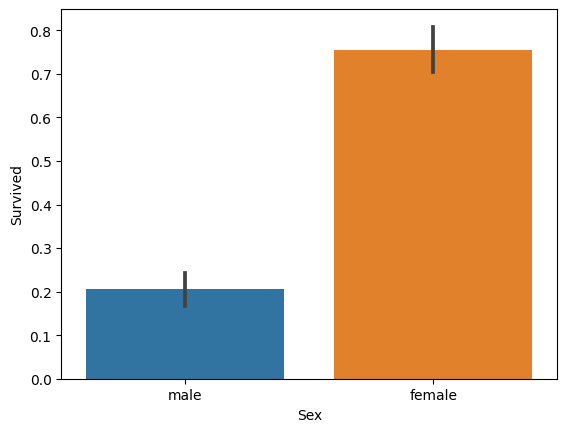

In [ ]:
sns.barplot(x='Sex', y= 'Survived', data=df_train)

<Axes: xlabel='Embarked', ylabel='Survived'>

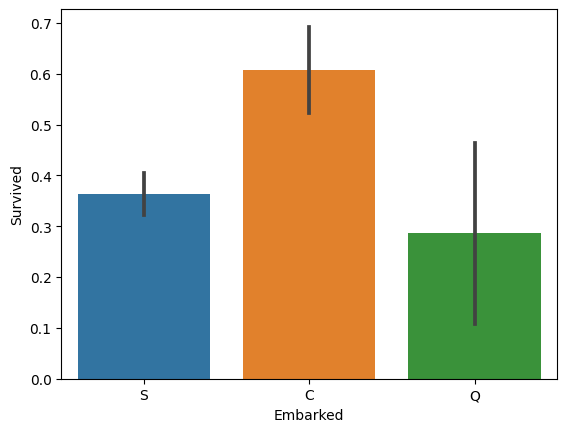

In [ ]:
sns.barplot(x='Embarked', y= 'Survived', data=df_train)

<Axes: xlabel='Pclass', ylabel='Survived'>

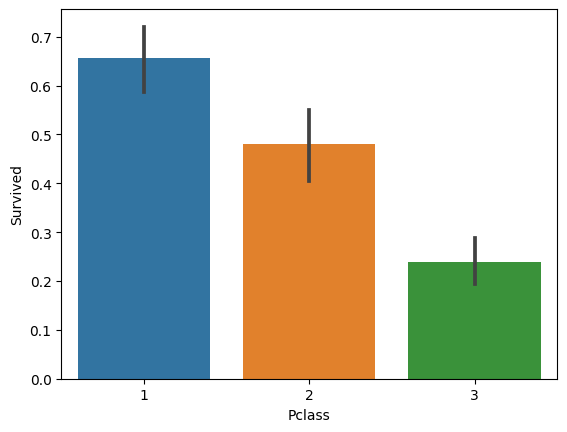

In [ ]:
sns.barplot(x='Pclass', y= 'Survived', data=df_train)

Ao analisar o gráfico, é possível notar que os passageiros que embarcaram em Cherbourg tiveram uma maior taxa de sobrevivência em comparação com os que embarcaram em outros locais. Além disso, é evidente que as pessoas pertencentes à primeira classe tiveram uma maior chance de sobreviver. Essas informações sugerem uma associação entre o local de embarque e a classe dos passageiros, indicando que aqueles que embarcaram em Cherbourg e estavam na primeira classe receberam prioridade durante as operações de resgate e evacuação.

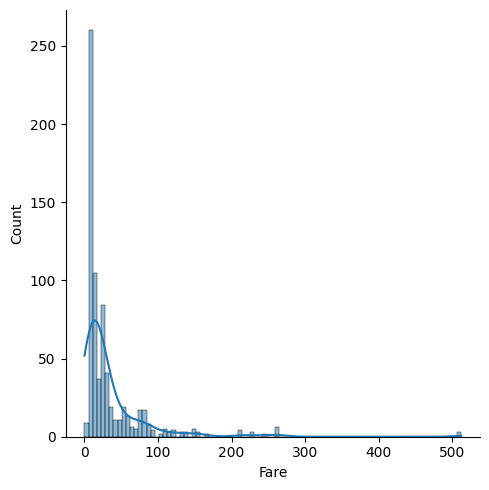

In [ ]:
sns.displot(df_train['Fare'], kde = True)

In [ ]:
classes = pd.get_dummies(df_train['Pclass'], prefix='Pclass')
classes

,Pclass_1,Pclass_2,Pclass_3
0,0,0,1
1,1,0,0
2,0,0,1
3,1,0,0
4,0,0,1
...,...,...,...
885,0,0,1
886,0,1,0
887,1,0,0
889,1,0,0


In [ ]:
Embarcados = pd.get_dummies(df_train['Embarked'], prefix='Embarked')
Embarcados

,Embarked_C,Embarked_Q,Embarked_S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1
...,...,...,...
885,0,1,0
886,0,0,1
887,0,0,1
889,1,0,0


In [ ]:
Train = df_train.drop(['Name', 'PassengerId', 'Cabin', 'Pclass', 'Embarked', 'Ticket'], axis=1)
Train = pd.concat([Train, classes, Embarcados], axis=1)
Train['Sex'] = Train['Sex'].replace(['male', 'female'], [0,1])
Train

,Survived,Sex,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S
0,0,0,22.0,1,0,7.2500,0,0,1,0,0,1
1,1,1,38.0,1,0,71.2833,1,0,0,1,0,0
2,1,1,26.0,0,0,7.9250,0,0,1,0,0,1
3,1,1,35.0,1,0,53.1000,1,0,0,0,0,1
4,0,0,35.0,0,0,8.0500,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
885,0,1,39.0,0,5,29.1250,0,0,1,0,1,0
886,0,0,27.0,0,0,13.0000,0,1,0,0,0,1
887,1,1,19.0,0,0,30.0000,1,0,0,0,0,1
889,1,0,26.0,0,0,30.0000,1,0,0,1,0,0


In [ ]:
train_X = Train.drop('Survived', axis=1)
train_X

,Sex,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S
0,0,22.0,1,0,7.2500,0,0,1,0,0,1
1,1,38.0,1,0,71.2833,1,0,0,1,0,0
2,1,26.0,0,0,7.9250,0,0,1,0,0,1
3,1,35.0,1,0,53.1000,1,0,0,0,0,1
4,0,35.0,0,0,8.0500,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
885,1,39.0,0,5,29.1250,0,0,1,0,1,0
886,0,27.0,0,0,13.0000,0,1,0,0,0,1
887,1,19.0,0,0,30.0000,1,0,0,0,0,1
889,0,26.0,0,0,30.0000,1,0,0,1,0,0


In [ ]:
train_y = Train['Survived']
train_y

0      0
1      1
2      1
3      1
4      0
      ..
885    0
886    0
887    1
889    1
890    0
Name: Survived, Length: 714, dtype: int64

In [ ]:
df_test[df_test['Fare'].isnull()]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [ ]:
df_test[df_test['Pclass'] == 3]['Fare'].mean()

12.459677880184332

In [ ]:
df_test['Fare'].fillna(df_test[df_test['Pclass'] == 3] ['Fare'].mean(), inplace = True)

In [ ]:
df_test[df_test['Age'].isnull()]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [ ]:
df_test['Age'].fillna(df_test['Age'].mean(), inplace=True)
df_test['Age'] = df_test['Age'].mean()

In [ ]:
classes_test = pd.get_dummies(df_test['Pclass'], prefix='Pclass')
Embarcados_test = pd.get_dummies(df_test['Embarked'], prefix='Embarked')
df_test['Sex'] = df_test['Sex'].replace(['male', 'female'], [0,1])
test = df_test.drop(['Name', 'Cabin', 'Pclass', 'Embarked', 'Ticket'], axis=1)
test = pd.concat([test, classes_test, Embarcados_test], axis=1)
passageirosId = test
test = test.drop(['PassengerId'], axis=1)
test_X = test
test

,Sex,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S
0,0,30.27259,0,0,7.8292,0,0,1,0,1,0
1,1,30.27259,1,0,7.0000,0,0,1,0,0,1
2,0,30.27259,0,0,9.6875,0,1,0,0,1,0
3,0,30.27259,0,0,8.6625,0,0,1,0,0,1
4,1,30.27259,1,1,12.2875,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
413,0,30.27259,0,0,8.0500,0,0,1,0,0,1
414,1,30.27259,0,0,108.9000,1,0,0,1,0,0
415,0,30.27259,0,0,7.2500,0,0,1,0,0,1
416,0,30.27259,0,0,8.0500,0,0,1,0,0,1


In [ ]:
test.isnull().sum()

Sex           0
Age           0
SibSp         0
Parch         0
Fare          0
Pclass_1      0
Pclass_2      0
Pclass_3      0
Embarked_C    0
Embarked_Q    0
Embarked_S    0
dtype: int64

In [ ]:
def functionAcuracia(algoritmoFunc, train_X, train_y, vc):
  modelo = algoritmoFunc.fit(train_X, train_y)
  acuracia_modelo = round(modelo.score(train_X, train_y) * 100, 2)

  trainPredict = model_selection.cross_val_predict(algoritmoFunc, train_X, train_y, cv = vc, n_jobs = -1)
  acuracia_VC = round(metrics.accuracy_score(train_y, trainPredict) * 100, 2)

  return acuracia_modelo, acuracia_VC

In [ ]:
# Gradient Boost Classifier

accuracy_gbc, accuracy_vc_gbc= functionAcuracia(GradientBoostingClassifier(), train_X, train_y, 10)
print(f"Acuracia : {accuracy_gbc}")
print(f"Acuracia validação Cruzada : {accuracy_vc_gbc}")

Acuracia : 91.04
Acuracia validação Cruzada : 82.63


In [ ]:
# Decision Tree Classifiers

accuracy_dtc, accuracy_vc_dtc= functionAcuracia(DecisionTreeClassifier(), train_X, train_y, 10)
print(f"Acuracia : {accuracy_dtc}")
print(f"Acuracia validação Cruzada : {accuracy_vc_dtc}")

Acuracia : 98.6
Acuracia validação Cruzada : 77.87


In [ ]:
# Stochastic Gradient Descent

accuracy_sgd, accuracy_vc_sgd= functionAcuracia(SGDClassifier(), train_X, train_y, 10)
print(f"Acuracia : {accuracy_sgd}")
print(f"Acuracia validação Cruzada : {accuracy_vc_sgd}")

Acuracia : 77.87
Acuracia validação Cruzada : 70.45


In [ ]:
#Linear Support Vector Machines (SVC)

accuracy_linear_lsvc, accuracy_vc_lsvc= functionAcuracia(LinearSVC(dual = False), train_X, train_y, 10)
print(f"Acuracia : {accuracy_linear_lsvc}")
print(f"Acuracia validação Cruzada : {accuracy_vc_lsvc}")

Acuracia : 79.83
Acuracia validação Cruzada : 78.99


In [ ]:
#Gaussian Naive Bayes

accuracy_gaussianNB, accuracy_vc_gaussianNB= functionAcuracia(GaussianNB(), train_X, train_y, 10)
print(f"Acuracia : {accuracy_gaussianNB}")
print(f"Acuracia validação Cruzada : {accuracy_vc_gaussianNB}")

Acuracia : 77.87
Acuracia validação Cruzada : 76.33


In [ ]:
#K-Nearest Neighbours

accuracy_knn, accuracy_vc_knn= functionAcuracia(KNeighborsClassifier(), train_X, train_y, 10)
print(f"Acuracia : {accuracy_knn}")
print(f"Acuracia validação Cruzada : {accuracy_vc_knn}")

Acuracia : 78.99
Acuracia validação Cruzada : 69.89


In [ ]:
#Random Forest

accuracy_randomF, accuracy_vc_randomF = functionAcuracia(RandomForestClassifier(), train_X,train_y , 10)

print(f"Acuracia : {accuracy_randomF}")
print(f"Acuracia validação Cruzada : {accuracy_vc_randomF}")

Acuracia : 98.6
Acuracia validação Cruzada : 80.25


In [ ]:
#Logistic Regression
accuracy_logRe, accuracy_vc_logRe = functionAcuracia(LogisticRegression(max_iter = 1000), train_X, train_y, 10)
print(f"Acuracia : {accuracy_logRe}")
print(f"Acuracia validação Cruzada : {accuracy_vc_logRe}")

Acuracia : 80.39
Acuracia validação Cruzada : 79.55


In [ ]:
params = dict(
    max_depth = [n for n in range(1, 5)],
    min_samples_split = [n for n in range(2 , 6)],
    min_samples_leaf = [n for n in range(2, 6)],
    n_estimators = [n for n in range(10, 50, 10)]
)

In [ ]:
GBoostingClassifier = GradientBoostingClassifier()

In [ ]:
GBoostingClassifier_vc = GridSearchCV(estimator = GBoostingClassifier, param_grid = params, cv = 10)

In [ ]:
GBoostingClassifier_vc.fit(train_X, train_y)

GridSearchCV(cv=10, estimator=GradientBoostingClassifier(),
             param_grid={'max_depth': [1, 2, 3, 4],
                         'min_samples_leaf': [2, 3, 4, 5],
                         'min_samples_split': [2, 3, 4, 5],
                         'n_estimators': [10, 20, 30, 40]})

In [ ]:
print(f"Melhor pontu : {GBoostingClassifier_vc.best_score_}")
print(f"Melhor pontu dos Parametros: {GBoostingClassifier_vc.best_estimator_}")

Melhor pontu : 0.8250195618153364
Melhor pontu dos Parametros: GradientBoostingClassifier(max_depth=2, min_samples_leaf=2, n_estimators=30)


In [ ]:
GBoostingClassifier_pred= GBoostingClassifier_vc.predict(test_X)

In [ ]:
passageirosId = passageirosId.drop(['Sex', 'SibSp', 'Age', 'Parch', 'Fare', 'Pclass_1', 'Pclass_2', 'Pclass_3', 'Embarked_C', 'Embarked_Q', 'Embarked_S'], axis=1)
passageirosId

,PassengerId
0,892
1,893
2,894
3,895
4,896
...,...
413,1305
414,1306
415,1307
416,1308


In [ ]:
sobreviventes = pd.DataFrame({'Survived': GBoostingClassifier_pred}, index=range(len(passageirosId)))

In [ ]:
passageirosId = passageirosId['PassengerId'].values.flatten()
sobreviventes = sobreviventes['Survived'].values.flatten()
resposta = pd.DataFrame({'PassengerId': passageirosId, 'Survived' : sobreviventes}, index=range(len(passageirosId)))
resposta = pd.DataFrame(resposta, columns=['PassengerId','Survived'])

In [ ]:
resposta

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [ ]:
resposta.to_csv('solucao.csv', index=False)